# Helixscope Developer Notebook

This notebook explains the metadata and back-end queries required to build the Helixscope project. The project depends on the `helixscope` carto account: [helixscope.carto.com](helixscope.carto.com). In this account we have several shapefiles:

* gadm28_countries : *admin0 level geometries (these may possibly not be needed)*
* good_five_grid   : *a 5x5 degree grid intersected with natural earth landcover polygons, which will be the basis for the choropleth map.*

and several tables:
* master_admin0 : *The admin-0 (country-level) table holding processed data for all helixscope datasets. This will be needed to build the COUNTRY PAGES*
* master_5x5 : *The 5x5 degree gridded data, needed to build the map. This contains a SUBSET of the helixscope data only. - just the data which should be mapped.*

Note that the `master_5x5` and `master_admin0` data tables contain values for `mean`, `min`, `max`, and `std` for almost all data. (The only exceptions are the flood data and agricultural data, which should only have `mean`, and shuld only appear on the country pages - and are only present in the `master_admin0` table.


## JSON resouces

Below are listed some required JSON mappings.


#### Specific warming levels 
```json
{'1.5':'1.5°C warming',
 '2':'2°C warming',
 '4':'4°C warming',
 '6':'6°C warming'}
```

#### Variables in master 5x5 table and their short names

```json
in progress
```


#### Variables in master_5x5 table and their long names

`variable`, and their human-readable long description

```json
 in progress

```

#### Variables in master_admin0 table and their short names

`variable` human-readable value as a short name. The value should be exposed in menus and as titles.

```json
{
'Maize_Irrigation_avoided_perc_change':'Maize yield change avoided by irrigation',
'Maize_yield_perc_change':'Maize yield change',
'Rice_Irrigation_avoided_perc_change':'Rice yield change avoided by irrigation',
'Rice_yield_perc_change':'Rice yield change',
'Soybeans_Irrigation_avoided_perc_change':'Soybeans yield change avoided by irrigation',
'Soybeans_yield_perc_change':'Soybeans yield change',
'Wheat_Irrigation_avoided_perc_change':'Wheat yield change avoided by irrigation',
'Wheat_yield_perc_change':'Wheat yield change',
'amphibianobiodiversity':'Amphibian species richness - without movement',
'amphibiarealbiodiversity':'Amphibian species richness',
'birdnobiodiversity':'Bird species richness - without movement',
'birdrealbiodiversity':'Bird species richness',
'evap':'Evapotranspiration',
'cSoil':"Soil carbon content",
'cVeg':'Vegetation biomass',
'gpp':'Gross primary productivity',
'mammalnobiodiversity':'Mammalian species richness remaining - without movement',
'mammalrealbiodiversity':'Mammalian species richness',
'nbp':'Net Biome productivity',
'perc_change_low_roff':'10th percentile runoff production',
'perc_change_roff':'Runoff production',
'pr':'Precipitation',
'reptilenobiodiversity':'Reptile species richness - without movement',
'reptilerealbiodiversity':'Reptile species richness',
'river_floods_ExpDam':'Damage from river flooding',
'river_floods_PopAff': 'Population affected by river flooding',
'time_perc_change_SPI48':'Time change under drought conditions, from SPI48',
'time_perc_change_SPI6':'Time change under drought conditions, from SPI6',
'time_perc_change_SRI48':'Time change under drought conditions from SRI48',
'time_perc_change_SRI6':'Time change under drought conditions from SRI6',
'tn':'Average monthly minimum temperature',
'tx':'Average monthly maximum temperature',
'ts':"Average monthly temperature",
}
```


#### master_admin0 table variables and a long human readable description


```json
{
    'Maize_Irrigation_avoided_perc_change':'Change in maize crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Maize_yield_perc_change':'Change in maize yield in percent (%) relative to 1981–2010 levels.',
    'Rice_Irrigation_avoided_perc_change':'Change in rice crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Rice_yield_perc_change':'Change in rice yield in percent (%) relative to 1981–2010 levels.',
    'Soybeans_Irrigation_avoided_perc_change':'Change in soybean crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Soybeans_yield_perc_change':'Change in soybean yield in percent (%) relative to 1981–2010 levels.',
    'Wheat_Irrigation_avoided_perc_change':'Change in wheat crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Wheat_yield_perc_change':'Change in wheat yield in percent (%) relative to 1981–2010 levels.',
    'amphibianobiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'amphibiarealbiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'birdnobiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'birdrealbiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'cSoil':"Soil carbon content (kg m-2).",
    'cVeg':'Vegetation biomass (kg m-2).',
    'evap':'Evapotranspiration (kg m-2 yr-1).',
    'gpp':'Gross Primary Productivity (gC m-2 yr-1)',
    'mammalnobiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'mammalrealbiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'nbp':'Net Biome productivity (gC m-2 yr-1).',
    'perc_change_low_roff':'Relative (%) change in 10th percentile runoff production, derived from daily runoff data.',
    'perc_change_roff':'Relative (%) change in mean runoff production, derived from daily runoff data.',
    'pr':'Precipitation (mm).',
    'reptilenobiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'reptilerealbiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'river_floods_ExpDam':'Direct expected damage per year by river flooding in Euros (in 2010 values) relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'river_floods_PopAff':'The number of people affected per year by river flooding relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'time_perc_change_SPI48':'Relative (%) change in time under drought conditions, defined as the sum of months with 48-month Standardised Precipitation Index (SPI48) below the value -1.5',
    'time_perc_change_SPI6':'Relative (%) change in time under drought conditions, defined as the sum of months with 6-month Standardised Precipitation Index (SPI6) below the value -1.5',
    'time_perc_change_SRI48':'Relative (%) change in time under drought conditions, defined as the sum of months with 48-month Standardised Runoff Index (SRI48) below the value -1.5',
    'time_perc_change_SRI6':'Relative (%) change in time under drought conditions, defined as the sum of months with 6-month Standardised Runoff Index (SRI6) below the value -1.5',
    'tn':'Annual average minimum temperature (degrees Celsius)',
    'ts':"Annual average temperature (degrees Celsius)",
    'tx':'Annual average maximum temperature (degrees Celsius)',
}
```

#### Dictionary of variables to widget labels (name and units) 

The units dictionary is required for plotting widgets, and maps the variable name to the label to put on plot axes.

```json


```


#### impact_tag and human readable version for menus

```json
{
'bd':'Biodiversity',
'w':'Water',
'eco':'Ecosystem',
'ag':'Agriculture',
'cl':'Climate',
}
```


### Tool-tip widget

The choropleth map will require a pop-up containing some dynamic text, and a widget. The widget is meant to convey the range of model results for a given cell.
It will need to include:

* a title indicating the human readable variable name and SWL info
* values by model
* a box-plot fit to those values
* a dynamic sentence explaining basic info

All the data componenets required to build this tooltip should be found inside this notebook.

![](./pics/tooltip.png)

In [20]:
import folium
import pprint
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [141]:
short_name_json = {
'Maize_Irrigation_avoided_perc_change':'Maize yield change avoided by irrigation',
'Maize_yield_perc_change':'Maize yield change',
'Rice_Irrigation_avoided_perc_change':'Rice yield change avoided by irrigation',
'Rice_yield_perc_change':'Rice yield change',
'Soybeans_Irrigation_avoided_perc_change':'Soybeans yield change avoided by irrigation',
'Soybeans_yield_perc_change':'Soybeans yield change',
'Wheat_Irrigation_avoided_perc_change':'Wheat yield change avoided by irrigation',
'Wheat_yield_perc_change':'Wheat yield change',
'amphibianobiodiversity':'Amphibian species richness - without movement',
'amphibiarealbiodiversity':'Amphibian species richness',
'birdnobiodiversity':'Bird species richness - without movement',
'birdrealbiodiversity':'Bird species richness',
'evap':'Evapotranspiration',
'cSoil':"Soil carbon content",
'cVeg':'Vegetation biomass',
'gpp':'Gross primary productivity',
'mammalnobiodiversity':'Mammalian species richness remaining - without movement',
'mammalrealbiodiversity':'Mammalian species richness',
'nbp':'Net Biome productivity',
'perc_change_low_roff':'10th percentile runoff production',
'perc_change_roff':'Runoff production',
'pr':'Precipitation',
'reptilenobiodiversity':'Reptile species richness - without movement',
'reptilerealbiodiversity':'Reptile species richness',
'river_floods_ExpDam':'Damage from river flooding',
'river_floods_PopAff': 'Population affected by river flooding',
'time_perc_change_SPI48':'Time change under drought conditions, from SPI48',
'time_perc_change_SPI6':'Time change under drought conditions, from SPI6',
'time_perc_change_SRI48':'Time change under drought conditions from SRI48',
'time_perc_change_SRI6':'Time change under drought conditions from SRI6',
'tn':'Average monthly minimum temperature',
'tx':'Average monthly maximum temperature',
'ts':"Average monthly temperature",
}


swl_json = {'1.5':'1.5°C warming',
 '2':'2°C warming',
 '4':'4°C warming',
 '6':'6°C warming'}

### Generate Choropleths 

Originall, the design intended to use admin-0 level choropleths based. This is no longer the idea, BUT incase you need to create them, you can do so using the carto Maps API with queries structured as below:

In [66]:
table_name = 'master_admin0'
var_name = 'tx'
swl_var = '2'
shapefile = 'gadm28_countries'
attribute = 'mean'

query=("WITH data as (SELECT * FROM {0} "
         "Where variable like '{1}' "
         "AND swl_info = '{2}') "
         "SELECT {3}.iso, {3}.the_geom_webmercator, "
         "{3}.cartodb_id, {4} from data inner join {3} "
         "on data.iso={3}.iso".format(
             table_name, var_name, swl_var, shapefile, attribute))

print(query)

style = """#layer {polygon-fill: ramp([mean], colorbrewer(RdYlBu), equal(10));
                   polygon-opacity: 0.9;}"""

account = 'helixscope'
urlCarto = 'https://'+account+'.carto.com/api/v1/map'
body = {
    "layers": [{
        "type": "cartodb",
        "options": {
            "sql": query,
            "cartocss":style,
            "cartocss_version": "2.1.1"
        }
    }]
}

r = requests.post(urlCarto, data=json.dumps(body), headers={'content-type': 'application/json; charset=UTF-8'})
print(r.url)
#pprint.pprint(r.json())

tileUrl = 'https://'+account+'.carto.com/api/v1/map/' + r.json()['layergroupid'] + '/{z}/{x}/{y}.png32';

map_osm2 = folium.Map(location=[45.5236, 0.6750], zoom_start=3, tiles="CartoDB", attr='random')
folium.TileLayer(
    tiles=tileUrl,
    attr='text',
    name='text',
    overlay=True
).add_to(map_osm2)

#map_osm2

WITH data as (SELECT * FROM master_admin0 Where variable like 'tx' AND swl_info = '2') SELECT gadm28_countries.iso, gadm28_countries.the_geom_webmercator, gadm28_countries.cartodb_id, mean from data inner join gadm28_countries on data.iso=gadm28_countries.iso
https://helixscope.carto.com/api/v1/map


![](./pics/eg0.png)

### Example of 5 x 5 grid

The choropleth maps should all be based on the following query:

In [10]:
table_name = 'master_5x5'
var_name = 'tx'
swl_var = '4'
shapefile = 'good_five_grid'
attribute = 'mean'   # Possible attributes here are 'max', 'min','mean','std'

query=("WITH data as (SELECT * FROM {0} "
         "Where variable like '{1}' "
         "AND swl_info = '{2}') "
         "SELECT {3}.id_val, {3}.the_geom_webmercator, "
         "{3}.cartodb_id, {4} from data inner join {3} "
         "on data.shape_id={3}.id_val".format(
             table_name, var_name, swl_var, shapefile, attribute))

print(query)


style = """#layer {polygon-fill: ramp([mean], colorbrewer(RdYlBu), equal(10));
                   polygon-opacity: 0.9;}"""

account = 'helixscope'
urlCarto = 'https://'+account+'.carto.com/api/v1/map'
body = {
    "layers": [{
        "type": "cartodb",
        "options": {
            "sql": query,
            "cartocss":style,
            "cartocss_version": "2.1.1"
        }
    }]
}

r = requests.post(urlCarto, data=json.dumps(body), headers={'content-type': 'application/json; charset=UTF-8'})
print(r.url)
#pprint.pprint(r.json())

tileUrl = 'https://'+account+'.carto.com/api/v1/map/' + r.json()['layergroupid'] + '/{z}/{x}/{y}.png32';

map_osm_grid = folium.Map(location=[45.5236, 0.6750], zoom_start=3, tiles="CartoDB", attr='random')
folium.TileLayer(
    tiles=tileUrl,
    attr='text',
    name='text',
    overlay=True
).add_to(map_osm_grid)

#map_osm_grid

WITH data as (SELECT * FROM master_5x5 Where variable like 'tx' AND swl_info = '4') SELECT good_five_grid.id_val, good_five_grid.the_geom_webmercator, good_five_grid.cartodb_id, mean from data inner join good_five_grid on data.shape_id=good_five_grid.id_val
https://helixscope.carto.com/api/v1/map


![](./pics/eg_grid.png)

![](./pics/eg_admin0.png)

## Call the data required to plot as a box-plot on click

When the map is clicked, all avaiable model values for the shape associated with the click should be returned in order to build the pop-up widget.

In [137]:
table_name = 'master_5x5'
var_name = 'tn'#'mammalrealbiodiversity'
swl_var = '4'
shapefile = 'good_five_grid'
attribute = 'mean'   # Possible attributes here are 'max', 'min','mean','std'
shape_id = 1  # unique id codes of all individual shapes in 5x5 shapefile

query=("SELECT model_short_name, model_long_name, run, {0} as value "
       "FROM {1} "
       "WHERE swl_info = {2}"
       "AND variable = '{3}'"
       "AND shape_id = {4}"
       "".format(attribute, table_name, swl_var, var_name, shape_id))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint.pprint(r.json())

SELECT model_short_name, model_long_name, run, mean as value FROM master_5x5 WHERE swl_info = 4AND variable = 'tn'AND shape_id = 1 

https://helixscope.carto.com/api/v2/sql?q=SELECT+model_short_name%2C+model_long_name%2C+run%2C+mean+as+value+FROM+master_5x5+WHERE+swl_info+%3D+4AND+variable+%3D+%27tn%27AND+shape_id+%3D+1 

{'fields': {'model_long_name': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'run': {'type': 'number'},
            'value': {'type': 'number'}},
 'rows': [{'model_long_name': 'ECEARTH-R6',
           'model_short_name': 'ECEARTH',
           'run': 6,
           'value': 25.85},
          {'model_long_name': 'HADGEM3-R3',
           'model_short_name': 'HADGEM3',
           'run': 3,
           'value': 25.76},
          {'model_long_name': 'ECEARTH-R1',
           'model_short_name': 'ECEARTH',
           'run': 1,
           'value': 26.04},
          {'model_long_name': 'ECEARTH-R7',
           'model_short_name': 'ECEARTH',
 

The values should be shown in a boxplot, as demonstrated below. 
The values for the boxplot will depend on what attribute is selected for a given variable (e.g. `mean` for variable `tx`).

The title of the plot and sentence that should accompany it should be dynamically generated using the json objects, as shown below.

The units of the plot (axis labels) should also be dynamically generated using the query paramaters and the previously listed json dictionaries (as shown below).

Note, the plot has two components to it:

1. A boxplot: You will need to calculate with a plotting libarary based on the returned values.

2. A scatter plot overplotted on the boxplot: The scatter-plot should have colored categories, where the categories are colored by the `model_short_name` and a ledgend should be below the plot showing that information. On hover, the individual scatter elements should show the `model_long_name`.

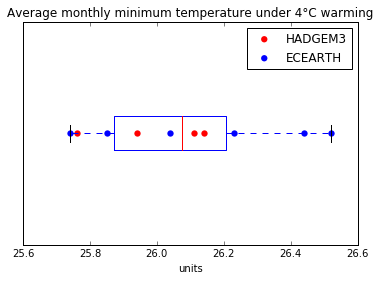

In [149]:
# Example of constructing the boxplot (which you can re-factor to your language / library of choice)

popup_title = ("{0} under {1}".format(short_name_json[var_name] ,swl_json[swl_var]))


d = r.json()

data = []
individual_point_labels = []
categories = []
for row in d.get('rows'):
    data.append(row.get('value', None))
    individual_point_labels.append(row.get('model_long_name'))
    categories.append(row.get('model_short_name'))

data = np.array(data)
categories = np.array(categories)
individual_point_labels = np.array(individual_point_labels)

unique_categories = set(categories) # get unique categories which will be colored differently
colors = ['red','blue','green','orange']
color_setter = {} 
for n, unique in enumerate(unique_categories):
    color_setter[unique] = colors[n]



plt.boxplot(data, 0, '', 0 )
for unique in unique_categories:
    tmp_data = [dat for dat, category in zip(data, categories) if category == unique]
    plt.scatter(tmp_data,
                [1]*len(tmp_data), c=color_setter[unique],
                marker='o', lw=0, s=40.0, label=unique)
plt.yticks([])
plt.title(popup_title)
plt.xlabel("units")
plt.legend(loc=0, scatterpoints = 1)
plt.show()

In [ ]:
dynamic_sentence

In [ ]:
"Area-averaged model range for {} at {}".format(var_name, swl_var)

### Example of Calling Country-wide data Tables

In [3]:
swl_variable = '4'
climate_variable = 'tx'
data_table = 'master_amin0'

query = """SELECT iso, mean, max, count, min, std, model_long_name, model_short_name, model_taxonomy
    FROM master_admin0
    Where swl_info = '4'
    AND season = 'MAM'
    AND model_short_name = 'HADGEM3'
    AND run = 1
    LIMIT 3
"""

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url)
pprint.pprint(r.json())

https://helixscope.carto.com/api/v2/sql?q=SELECT+iso%2C+mean%2C+max%2C+count%2C+min%2C+std%2C+model_long_name%2C+model_short_name%2C+model_taxonomy%0A++++FROM+master_admin0%0A++++Where+swl_info+%3D+%274%27%0A++++AND+season+%3D+%27MAM%27%0A++++AND+model_short_name+%3D+%27HADGEM3%27%0A++++AND+run+%3D+1%0A++++LIMIT+3%0A
{'fields': {'count': {'type': 'number'},
            'iso': {'type': 'string'},
            'max': {'type': 'number'},
            'mean': {'type': 'number'},
            'min': {'type': 'number'},
            'model_long_name': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'model_taxonomy': {'type': 'string'},
            'std': {'type': 'number'}},
 'rows': [{'count': 382,
           'iso': 'NOR',
           'max': 14.35,
           'mean': 8.33,
           'min': 1.04,
           'model_long_name': 'HADGEM3-R1',
           'model_short_name': 'HADGEM3',
           'model_taxonomy': 'HADGEM3',
           'std': 2.71},
          {'cou

## notes + dev past this point

In [ ]:
swl_variable = '1.5'
climate_variable = 'cSoil'
data_table = 'joined_summaries_2017_08_27'

query = """WITH data as (SELECT * FROM master_admin0
 Where variable like 'cSoil'
 AND swl_info = '1.5')
 SELECT gadm28_countries.iso2, gadm28_countries.the_geom_webmercator,
 gadm28_countries.cartodb_id, mean as mean from data inner join gadm28_countries 
 on data.iso2=gadm28_countries.iso2
"""

style = """#layer {polygon-fill: ramp([mean], colorbrewer(Reds), jenks());
                   polygon-opacity: 0.9;}"""

account = 'helixscope'
urlCarto = 'https://'+account+'.carto.com/api/v1/map'
body = {
    "layers": [{
        "type": "cartodb",
        "options": {
            "sql": query,
            "cartocss":style,
            "cartocss_version": "2.1.1"
        }
    }]
}

r = requests.post(urlCarto, data=json.dumps(body), headers={'content-type': 'application/json; charset=UTF-8'})
print(r.url)
pprint.pprint(r.json())

tileUrl = 'https://'+account+'.carto.com/api/v1/map/' + r.json()['layergroupid'] + '/{z}/{x}/{y}.png32';

map_osm_test = folium.Map(location=[45.5236, 0.6750], zoom_start=3)
folium.TileLayer(
    tiles=tileUrl,
    attr='text',
    name='text',
    overlay=True
).add_to(map_osm_test)

map_osm_test

In [ ]:
import geopandas as gpd

In [ ]:
s = gpd.read_file('./data/gadm28_countries/')

In [ ]:
s.head()

In [ ]:
s[s.iso == 'SSD']

## Example of retrieving data JSON

This will be necessary to build widgets attached to the data.

In [ ]:
# example of getting the raw data

swl_variable = '1.5'
climate_variable = 'cSoil'
data_table = 'joined_summaries_2017_08_27'

query = """SELECT iso2, mean, max, count, min, std, model_long_name, model_short_name, model_taxonomy
 FROM joined_summaries_2017_08_27
 Where variable like 'cSoil'
 AND swl_info = '1.5'
"""

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url)
pprint.pprint(r.json())

## Example of valid queries

Example of how to get the average over multiple runs of the same model, for a specific country (ES), for a specific SWL (1.5), for a specific variable (perc_change_roff).

```sql
SELECT iso2, variable, model_taxonomy, COUNT(helix_data.mean) num_runs, AVG(helix_data.mean) as model_mean, AVG(helix_data.max) as model_max
FROM helix_data
WHERE swl_info = '1.5'
AND iso2 = 'ES'
AND variable = 'perc_change_roff'
GROUP BY iso2, variable, model_taxonomy
```


Get all individual model values (multiple models and multiple runs) for a specific country, SWL, variable, returning metadata for the model taxnomy too.

```sql
SELECT iso2, model_taxonomy, run, variable, helix_data.mean as country_mean, helix_data.max as country_max
FROM helix_data
WHERE swl_info = '1.5'
AND iso2 = 'ES'
AND variable = 'perc_change_roff'
GROUP BY iso2, variable, model_taxonomy, mean, max, run
```


Get single average over all countries for a specific SWL, and specific variable (to create choropleth).

```sql
SELECT iso2, variable, AVG(helix_data.mean) as country_mean, AVG(helix_data.max) as country_max
FROM helix_data
WHERE swl_info = '1.5'
AND variable = 'cSoil'
GROUP BY iso2, variable

```

Get data average across table

```sql
SELECT iso2, variable, AVG(helix_data.mean) as model_mean, AVG(helix_data.max) as model_max
FROM joined_summaries_2017_08_27
WHERE swl_info = '1.5'
GROUP BY iso2, variable
```